In [522]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [523]:
# Read the data from csv file

bikeSharing_df = pd.read_csv('/content/day.csv')

# Check the head of the dataset

bikeSharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [524]:
# checking the shape of dataframe

bikeSharing_df.shape

(730, 16)

In [525]:
# describing the columns of dataframe

bikeSharing_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [526]:
# check dataframe for null and datatype

bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [527]:
# checking for the null values in column data

bikeSharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [528]:
#check the columns of data

bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [529]:
#check the size of data

bikeSharing_df.size

11680

In [530]:
#check the datatypes of data

bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [531]:
#check the axes of data
bikeSharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [532]:
#check the dimensions of data
bikeSharing_df.ndim

2

In [533]:
#check the values of data
bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [534]:
# renaming few columns for better readibility

bikeSharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [535]:
# Check the head of the dataset

bikeSharing_df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Step 2: Cleaning Data

2.1 Drop columns that are not useful for analysis

In [536]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bikeSharing_df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  days_old  
0   985         0  
1   801         1  
2  1349         2  
3  1562         3  
4  1600         4

In [537]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bikeSharing_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikeSharing_df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        6           0           2  14.110847   
1       1     0      1        0        0           0           2  14.902598   
2       1     0      1        0        1           1           1   8.050924   
3       1     0      1        0        2           1           1   8.200000   
4       1     0      1        0        3           1           1   9.305237   

      atemp  humidity  windspeed   cnt  days_old  
0  18.18125   80.5833  10.749882   985         0  
1  17.68695   69.6087  16.652113   801         1  
2   9.47025   43.7273  16.636703  1349         2  
3  10.60610   59.0435  10.739832  1562         3  
4  11.46350   43.6957  12.522300  1600         4

In [538]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [539]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [540]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [541]:
bikeSharing_df.corr()

season          year         month   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
year       -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
month       8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
humidity    2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.000023   

            workingday  weathersit      temp     atemp  humidity  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
year         -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
month        -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
humidity      0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.004619   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
year        0.569728  0.866026  
month       0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.067534 -0.000023  
workingday  0.062542 -0.004619  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
humidity   -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

- we can see that features like `season, mnth, weekday and  weathersit` are integers although they should be non-numerical categories.

### 2.2 Handle Missing values

In [542]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### _`Inference`_: There are no null values.

### 2.3 Handle Outliers

In [543]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt',
       'days_old'],
      dtype='object')

In [544]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
days_old      730
dtype: int64

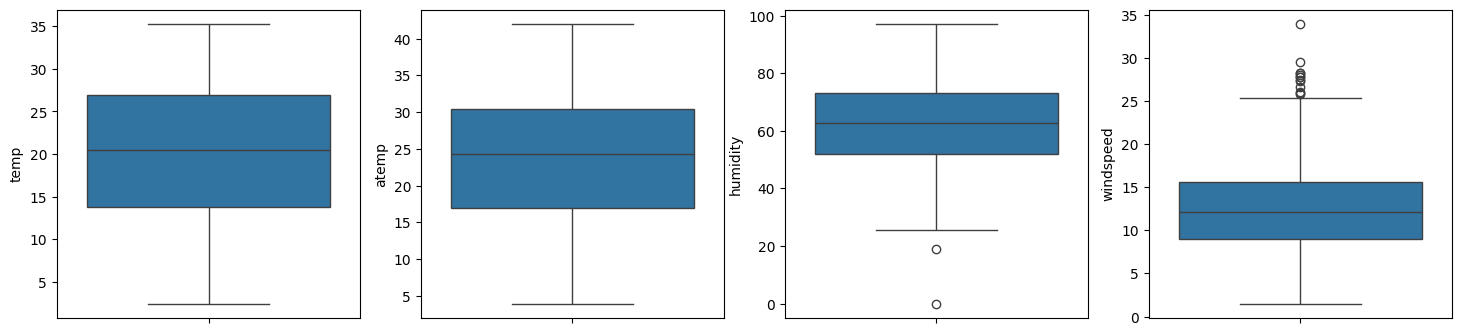

In [545]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1


From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

In [546]:
# Encoding/mapping the season column
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

# Encoding/mapping the weathersit column
bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

# Encoding/mapping the month column
bikeSharing_df.month = bikeSharing_df.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                                                     7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

# Encoding/mapping the weekday column
bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0   moderate  14.110847   
1  spring     0   jan        0     sun           0   moderate  14.902598   
2  spring     0   jan        0     mon           1       good   8.050924   
3  spring     0   jan        0     tue           1       good   8.200000   
4  spring     0   jan        0     wed           1       good   9.305237   

      atemp  humidity  windspeed   cnt  days_old  
0  18.18125   80.5833  10.749882   985         0  
1  17.68695   69.6087  16.652113   801         1  
2   9.47025   43.7273  16.636703  1349         2  
3  10.60610   59.0435  10.739832  1562         3  
4  11.46350   43.6957  12.522300  1600         4

## Step 3: Visualising the Data

#### 3.1 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

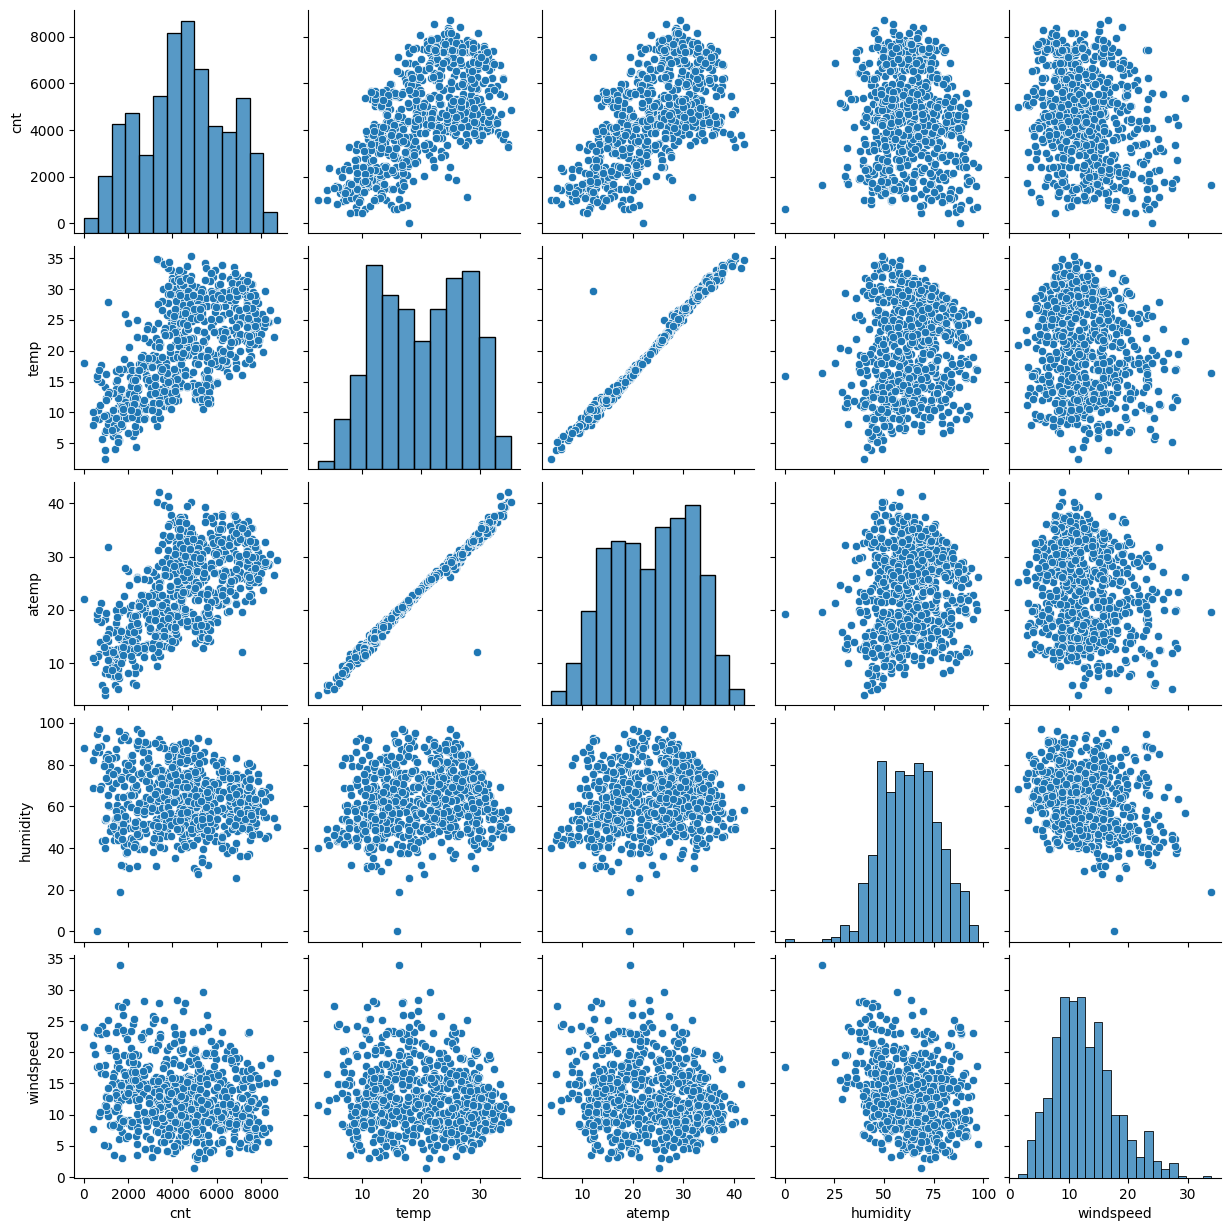

In [547]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

 _`Inference`_:
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

 As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

#### 3.2 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

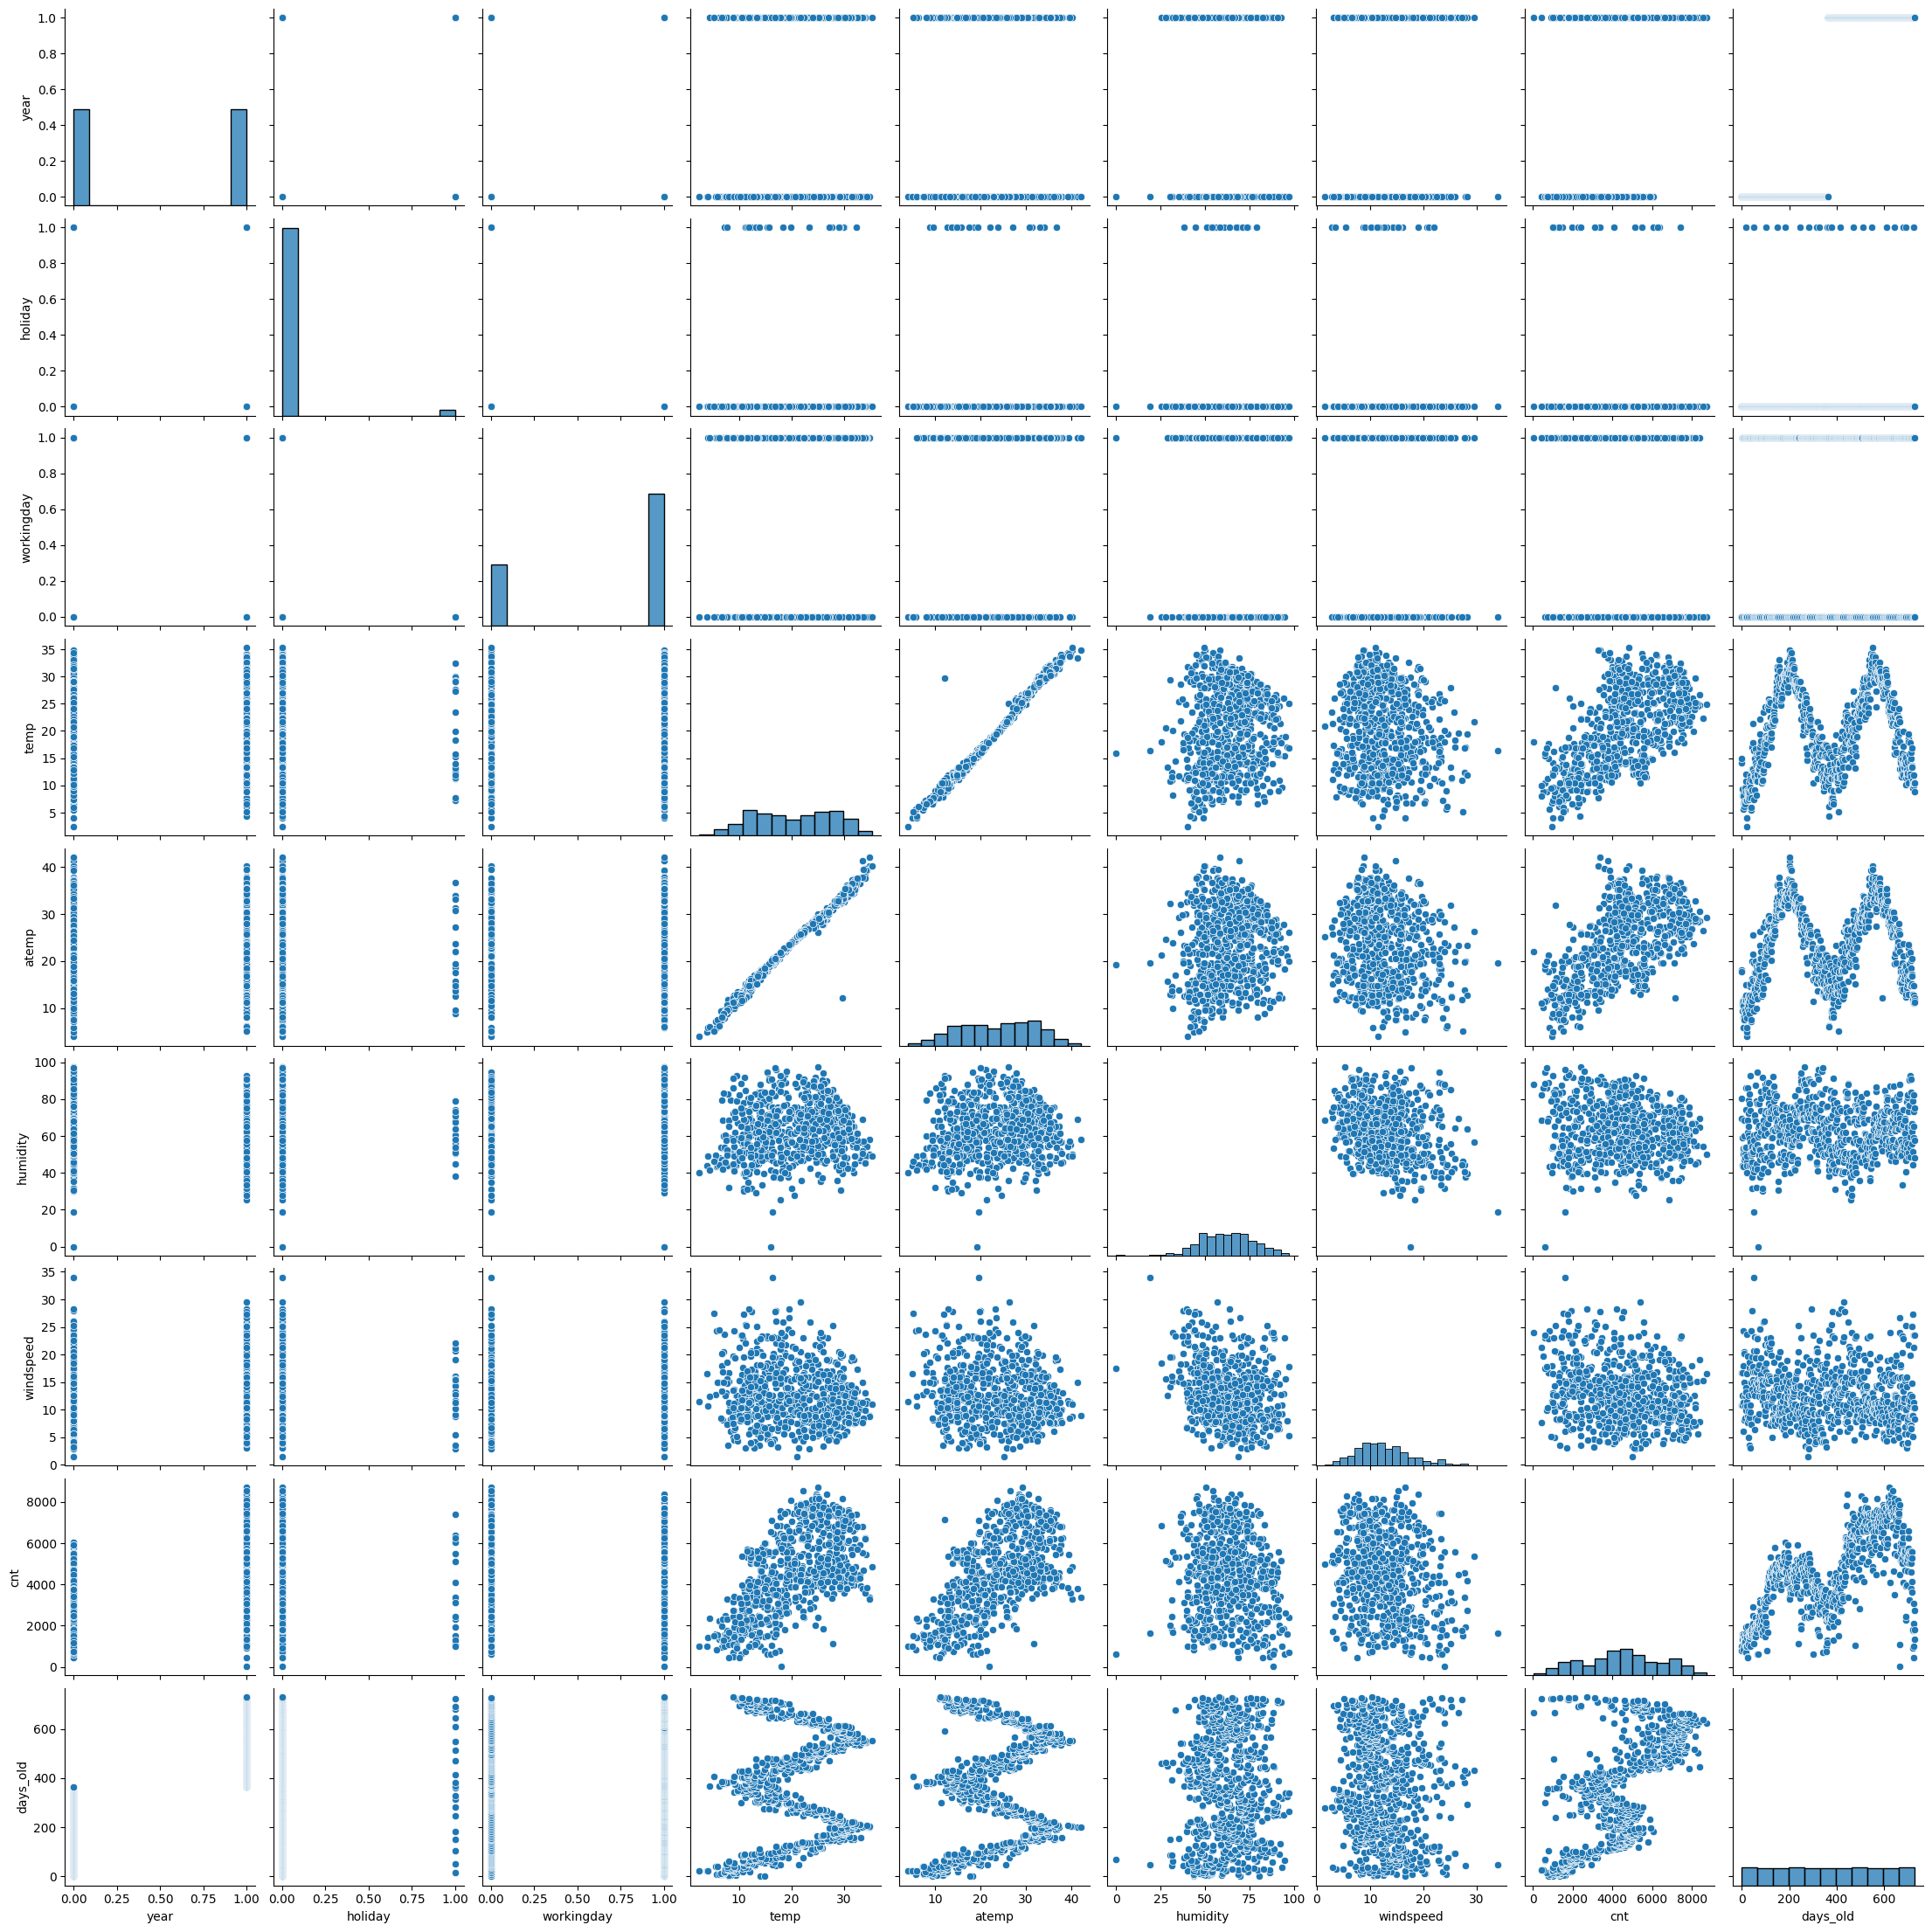

In [548]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

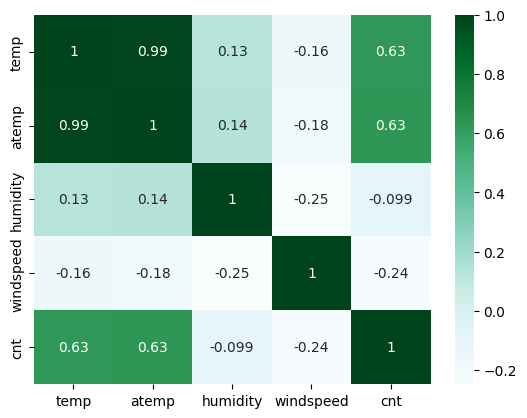

In [549]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

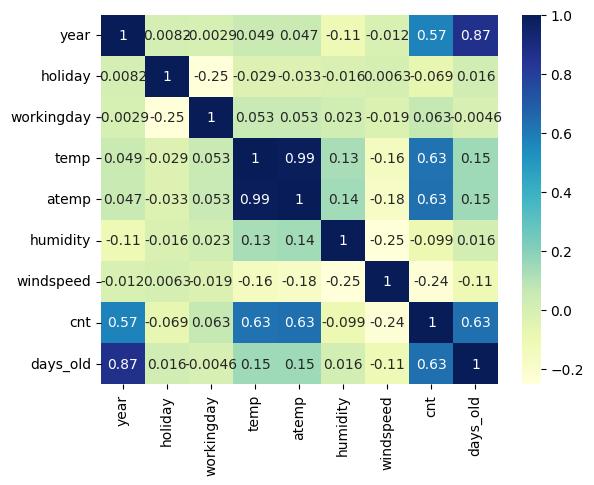

In [550]:
#Correlations for numeric variables
cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### 3.3 Draw Heatmap of correlation between variables

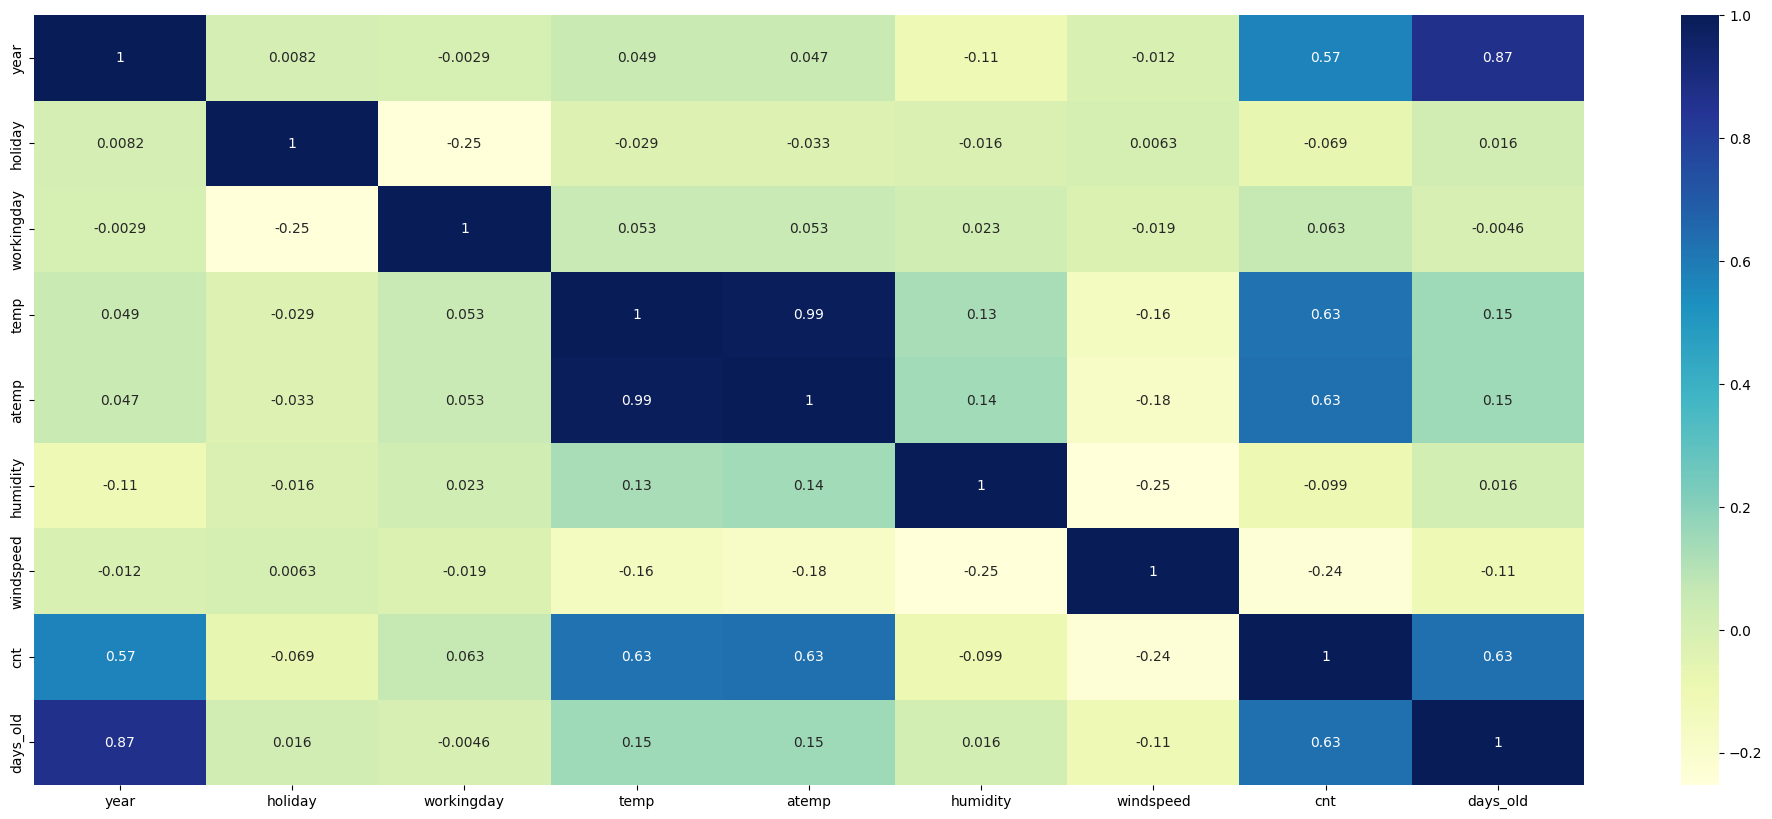

In [551]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.

We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

#### 3.4 Analysing Categorical Variabels with target variables

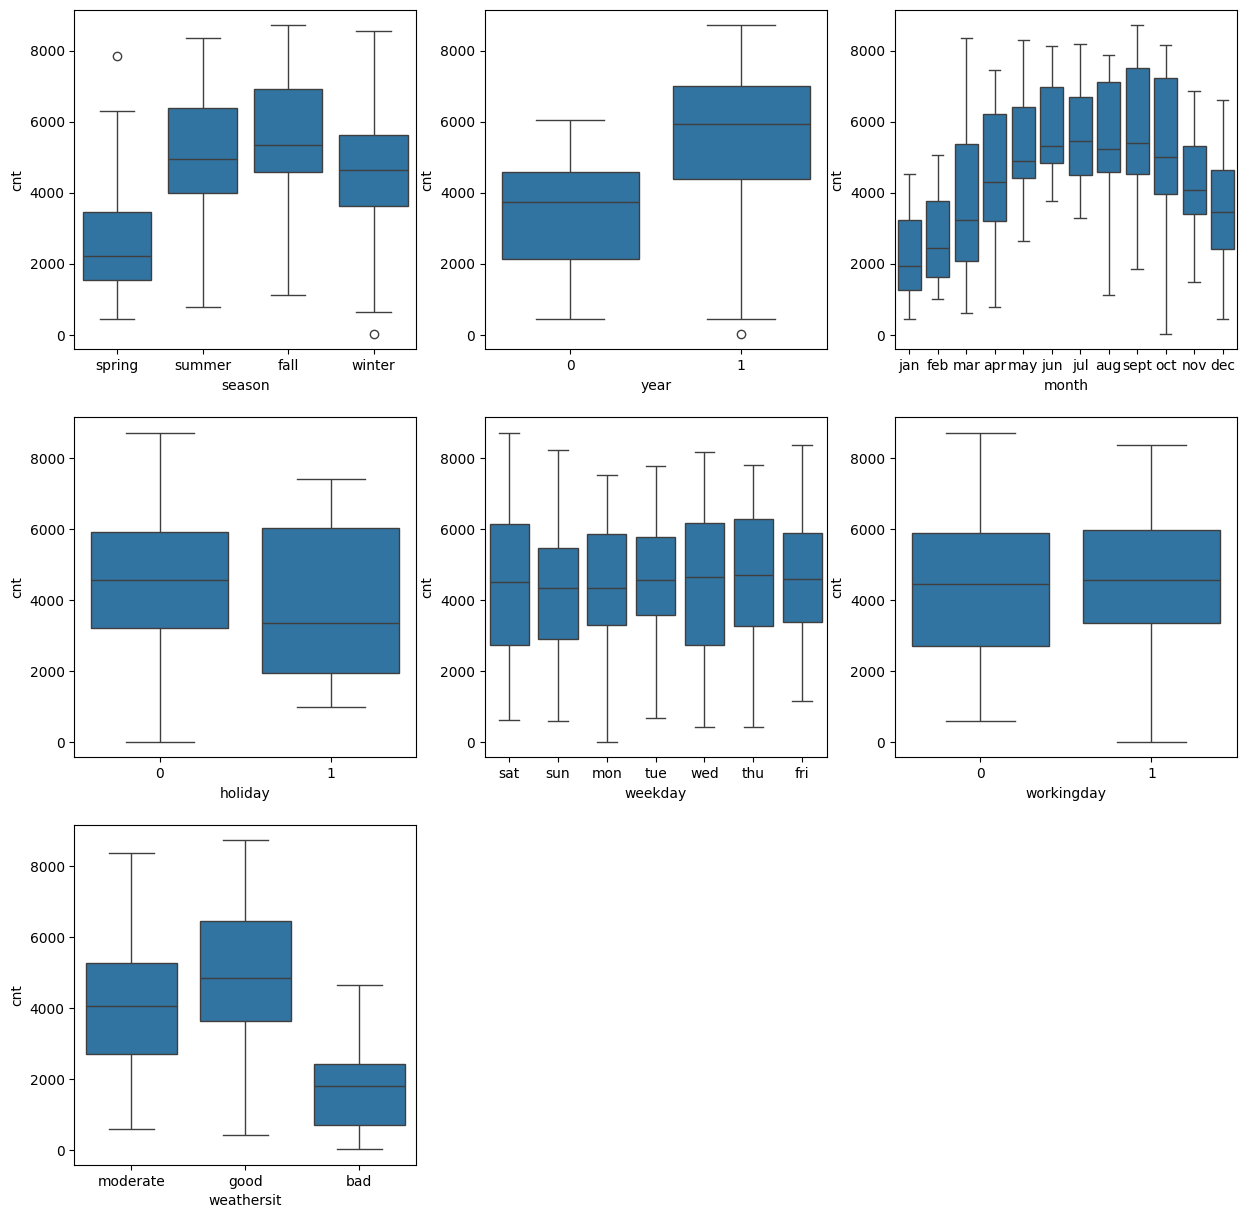

In [552]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

 _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

In [553]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  sns.barplot(x = column,y = 'cnt',data=bikeSharing_df)
  plt.subplot(1,2,2)
  sns.barplot(x = column,y = 'cnt',data=bikeSharing_df, hue='year',palette='Set1')
  plt.legend(labels=['2018', '2019'])
  plt.show()

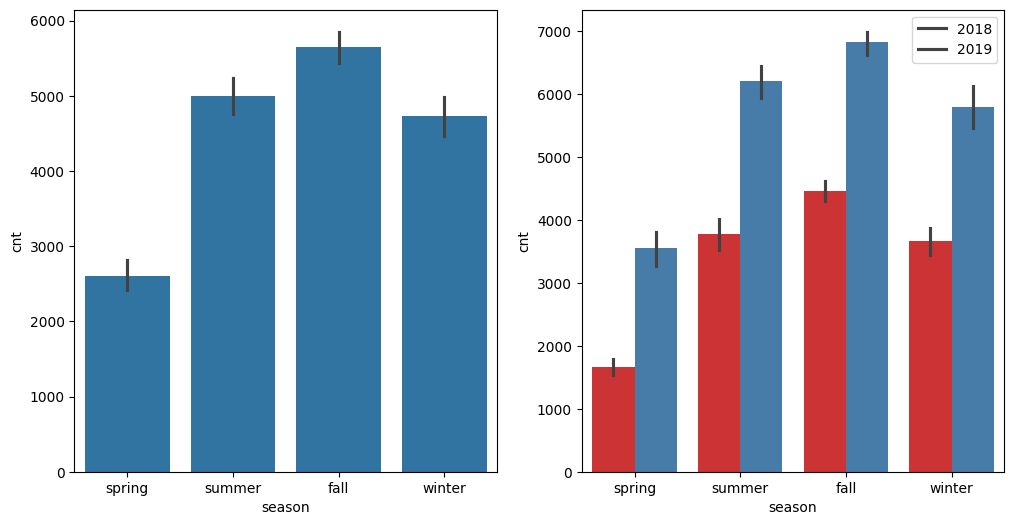

In [554]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

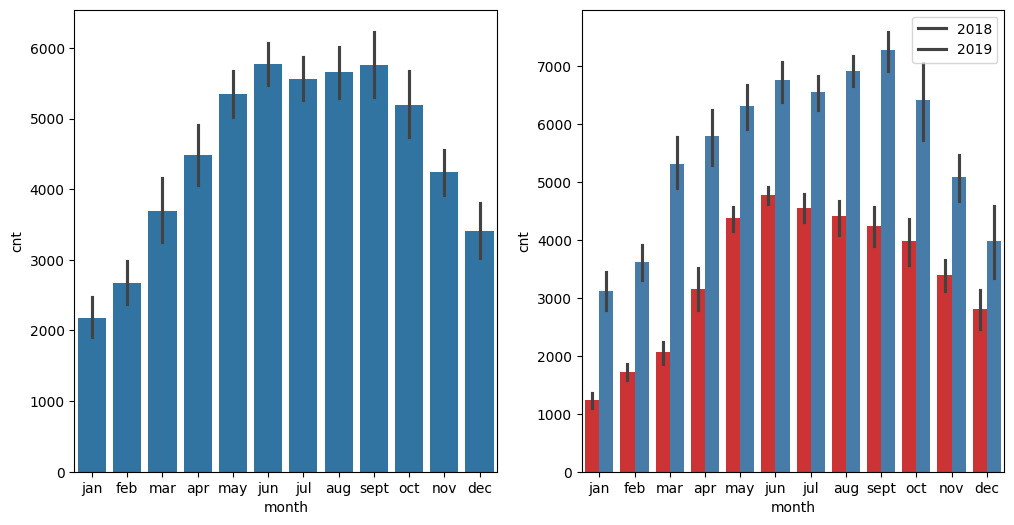

In [555]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

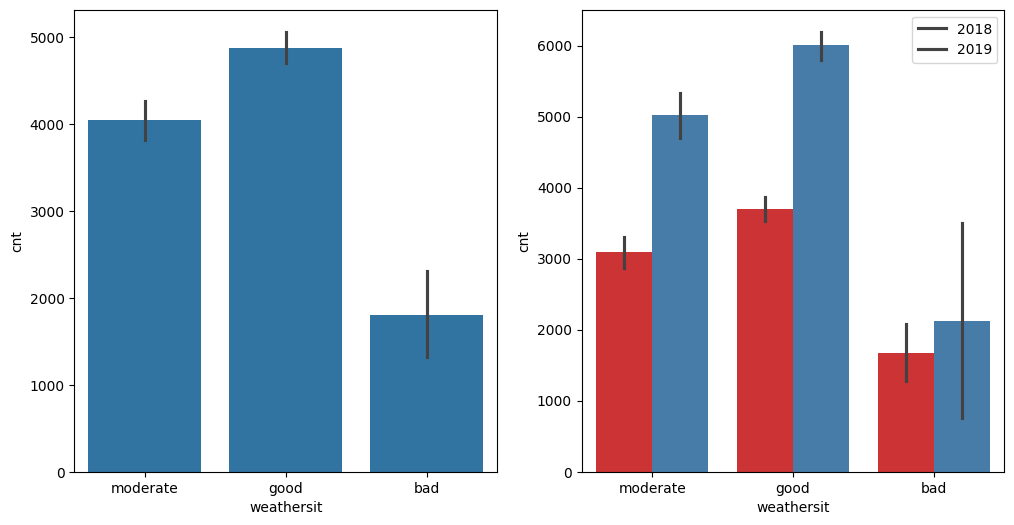

In [556]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

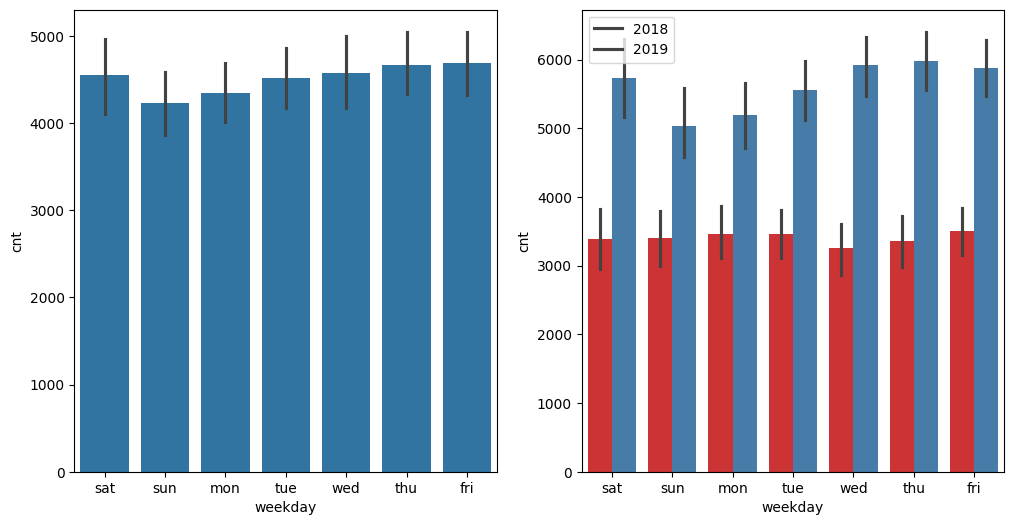

In [557]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

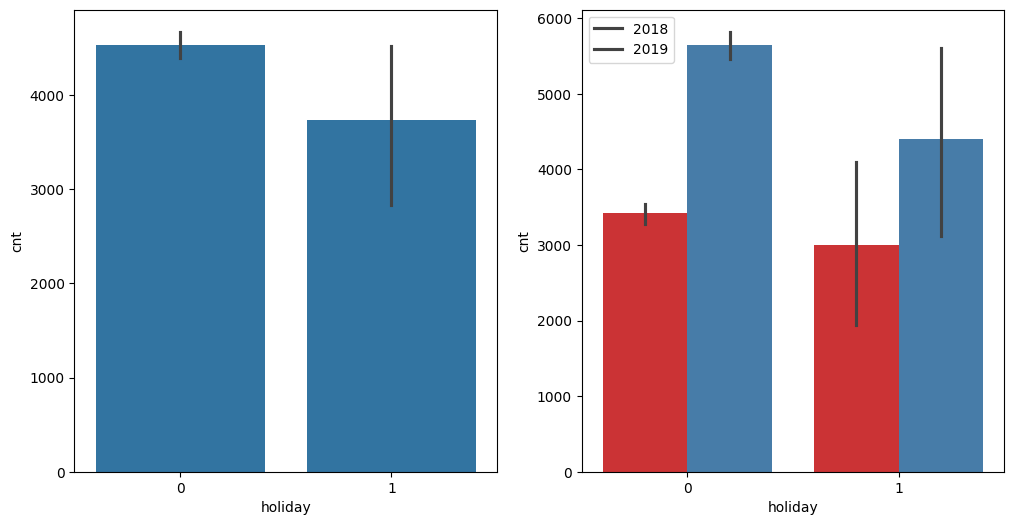

In [558]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

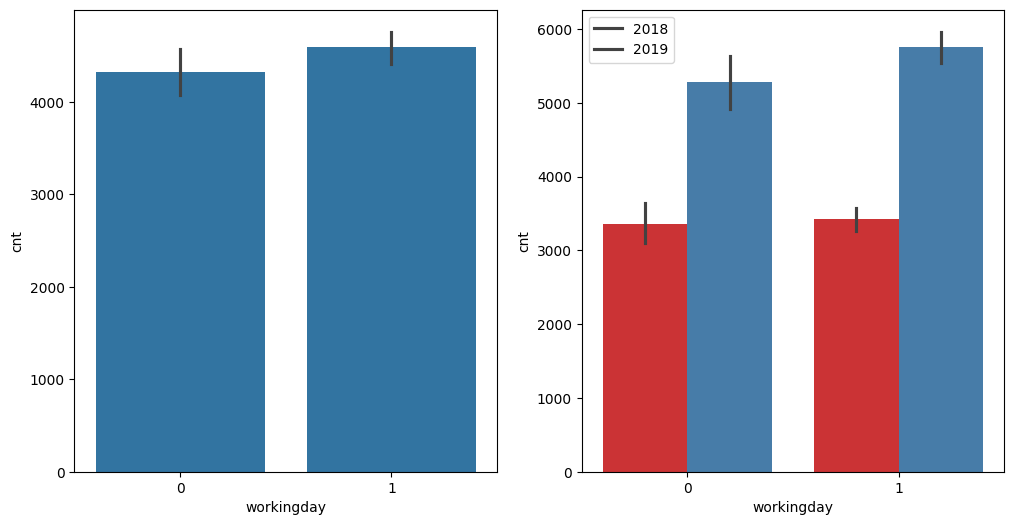

In [559]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

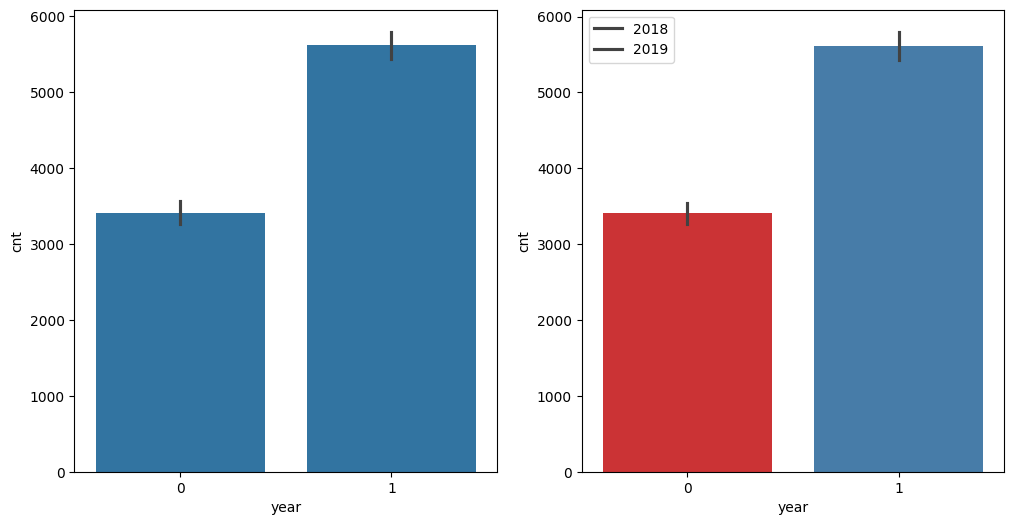

In [560]:
# plotting visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

In [561]:
def plot_cat_vs_column(column, label):
  plt.figure(figsize=(6,5),dpi=110)
  plt.title("Cnt vs " + column,fontsize=16)
  sns.regplot(data=bikeSharing_df,y="cnt",x=column)
  plt.xlabel(label)
  plt.show()




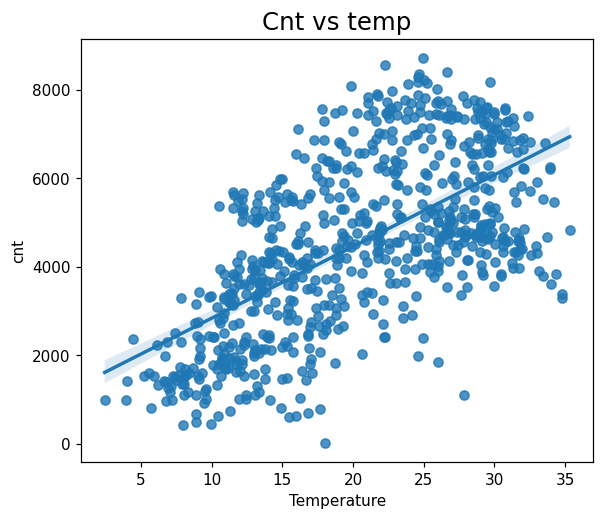

In [562]:
# plotting visualization for "Cnt vs Temp"

plot_cat_vs_column('temp', "Temperature")

 _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

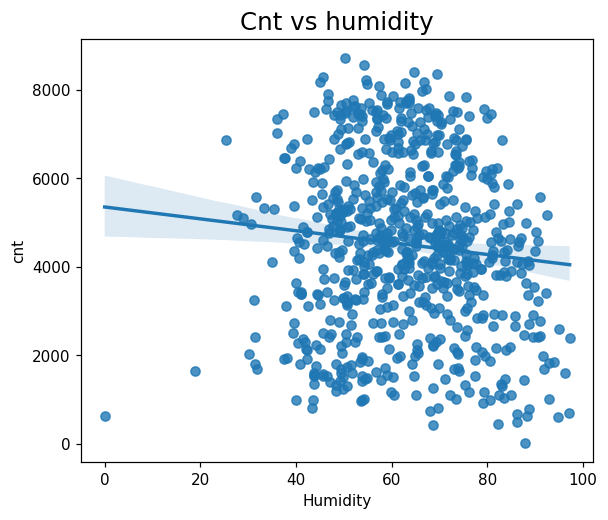

In [563]:
# plotting visualization for "Cnt vs humidity"

plot_cat_vs_column('humidity', "Humidity")

_`Inference`_:
- Humidity is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

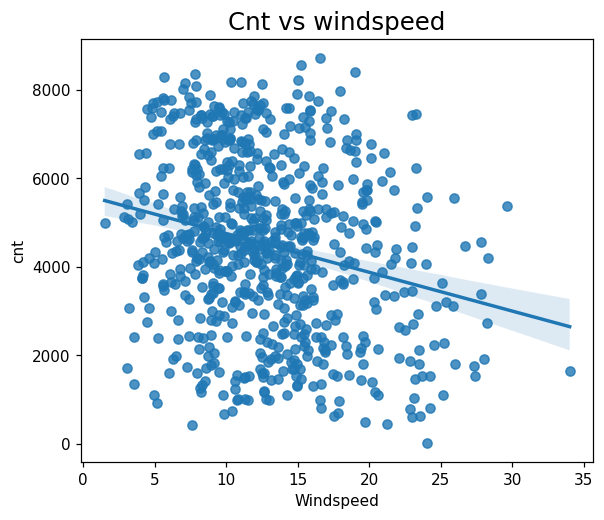

In [564]:
# plotting visualization for "Cnt vs windspeed"

plot_cat_vs_column('windspeed', "Windspeed")

_`Inference`_:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

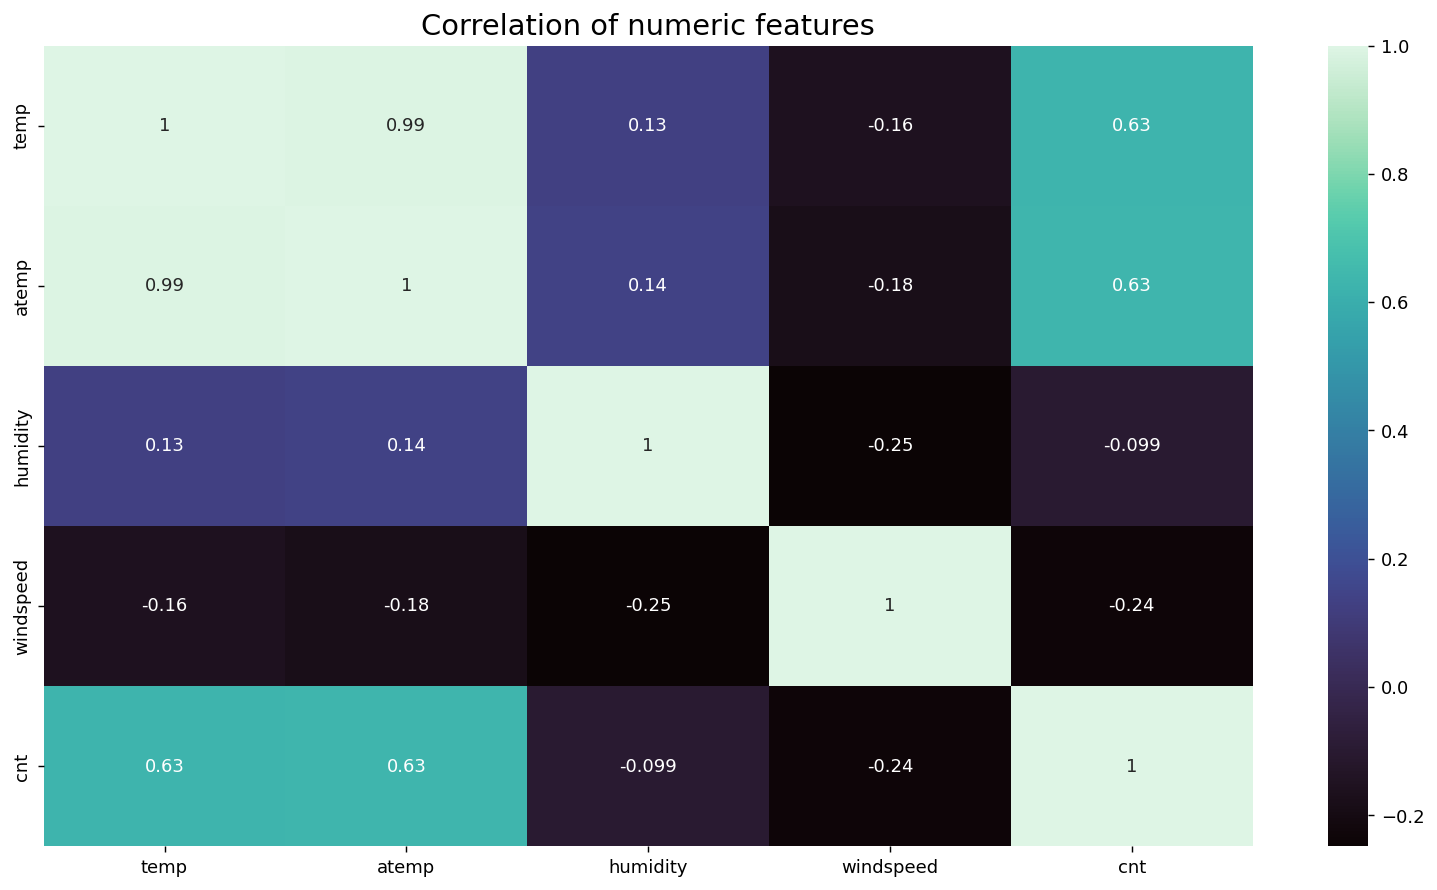

In [565]:
num_features = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

`_Inference`_:
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

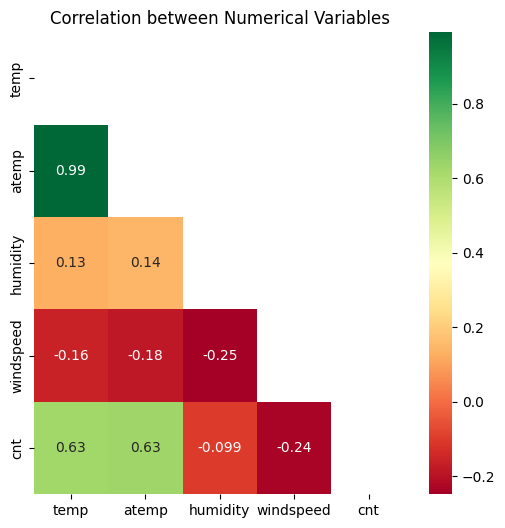

In [566]:
# Checking the correlation between the numerical variables other

plt.figure(figsize = (6,6))
matrix = np.triu(bikeSharing_df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bikeSharing_df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [567]:
bikeSharing_df.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    days_old  
count  730.000000   730.000000  730.000000  
mean    12.763620  4508.006849  364.500000  
std      5.195841  1936.011647  210.877136  
min      1.500244    22.000000    0.000000  
25%      9.041650  3169.750000  182.250000  
50%     12.125325  4548.500000  364.500000  
75%     15.625589  5966.000000  546.750000  
max     34.000021  8714.000000  729.000000

## Step 4: Data Preparation for Linear Regression


#### 4.1 Create dummy variables for all categorical variables

In [568]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikeSharing_df.month,drop_first=True)
weekdays_df=pd.get_dummies(bikeSharing_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikeSharing_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikeSharing_df.season,drop_first=True)

bikeSharing_df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0   moderate  14.110847   
1  spring     0   jan        0     sun           0   moderate  14.902598   
2  spring     0   jan        0     mon           1       good   8.050924   
3  spring     0   jan        0     tue           1       good   8.200000   
4  spring     0   jan        0     wed           1       good   9.305237   

      atemp  humidity  windspeed   cnt  days_old  
0  18.18125   80.5833  10.749882   985         0  
1  17.68695   69.6087  16.652113   801         1  
2   9.47025   43.7273  16.636703  1349         2  
3  10.60610   59.0435  10.739832  1562         3  
4  11.46350   43.6957  12.522300  1600         4

In [569]:
# Merging  the dataframe, with the dummy variable dataset.

df_new = pd.concat([bikeSharing_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)


In [570]:
df_new.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0   moderate  14.110847   
1  spring     0   jan        0     sun           0   moderate  14.902598   
2  spring     0   jan        0     mon           1       good   8.050924   
3  spring     0   jan        0     tue           1       good   8.200000   
4  spring     0   jan        0     wed           1       good   9.305237   

      atemp  humidity  ...  sat  sun  thu  tue  wed  good  moderate  spring  \
0  18.18125   80.5833  ...    1    0    0    0    0     0         1       1   
1  17.68695   69.6087  ...    0    1    0    0    0     0         1       1   
2   9.47025   43.7273  ...    0    0    0    0    0     1         0       1   
3  10.60610   59.0435  ...    0    0    0    1    0     1         0       1   
4  11.46350   43.6957  ...    0    0    0    0    1     1         0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 35 columns]

In [571]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
 13  aug         730 non-null    uint8  
 14  dec         730 non-null    uint8  
 15  feb         730 non-null    uint8  
 16  jan         730 non-null    uint8  
 17  jul         730 non-null    uint8  
 18  jun         730 non-null    uint8  
 19  mar         730 non-null    u

In [572]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [573]:
# check the head of new dataframe

df_new.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   days_old  aug  ...  sat  sun  thu  tue  wed  good  moderate  spring  \
0         0    0  ...    1    0    0    0    0     0         1       1   
1         1    0  ...    0    1    0    0    0     0         1       1   
2         2    0  ...    0    0    0    0    0     1         0       1   
3         3    0  ...    0    0    0    1    0     1         0       1   
4         4    0  ...    0    0    0    0    1     1         0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 31 columns]

In [574]:
# check the shape of new dataframe

df_new.shape

(730, 31)

In [575]:
# check the column info of new dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   days_old    730 non-null    int64  
 9   aug         730 non-null    uint8  
 10  dec         730 non-null    uint8  
 11  feb         730 non-null    uint8  
 12  jan         730 non-null    uint8  
 13  jul         730 non-null    uint8  
 14  jun         730 non-null    uint8  
 15  mar         730 non-null    uint8  
 16  may         730 non-null    uint8  
 17  nov         730 non-null    uint8  
 18  oct         730 non-null    uint8  
 19  sept        730 non-null    u


#### 4.2 Splitting the Data into Training and Testing Sets

In [576]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 13)

In [577]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [578]:
# check the shape of training datatset

df_train.shape

(510, 31)

In [579]:
# check the shape of testing datatset

df_test.shape

(220, 31)

### 4.3 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [580]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

# verifying the head of dataset before scaling.

df_train.head()

year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           0  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   
111     0        0           1  13.803347  16.0977   72.9583  14.707907  1683   

     days_old  aug  ...  sat  sun  thu  tue  wed  good  moderate  spring  \
576       576    0  ...    0    0    0    1    0     1         0       0   
426       426    0  ...    1    0    0    0    0     0         1       1   
728       728    0  ...    0    1    0    0    0     1         0       1   
482       482    0  ...    1    0    0    0    0     0         1       0   
111       111    0  ...    0    0    0    0    0     0         1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 31 columns]

In [581]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [582]:
# verifying the head after appying scaling.

df_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  days_old  aug  ...  sat  sun  thu  tue  wed  good  moderate  \
576  0.827658       576    0  ...    0    0    0    1    0     1         0   
426  0.465255       426    0  ...    1    0    0    0    0     0         1   
728  0.204096       728    0  ...    0    1    0    0    0     1         0   
482  0.482973       482    0  ...    1    0    0    0    0     0         1   
111  0.191095       111    0  ...    0    0    0    0    0     0         1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 31 columns]

In [583]:
# describing the dataset

df_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    days_old         aug  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499  367.680392    0.096078  ...    0.154902   
std      0.169803    0.224421  209.596164    0.294988  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420  186.250000    0.000000  ...    0.000000   
50%      0.296763    0.518638  372.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710  551.750000    0.000000  ...    0.000000   
max      1.000000    1.000000  728.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed        good    moderate  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.143137    0.133333    0.131373    0.158824    0.625490    0.345098   
std      0.350557    0.340268    0.338139    0.365870    0.484471    0.475867   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer      winter  
count  510.000000  510.000000  510.000000  
mean     0.243137    0.247059    0.247059  
std      0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 31 columns]

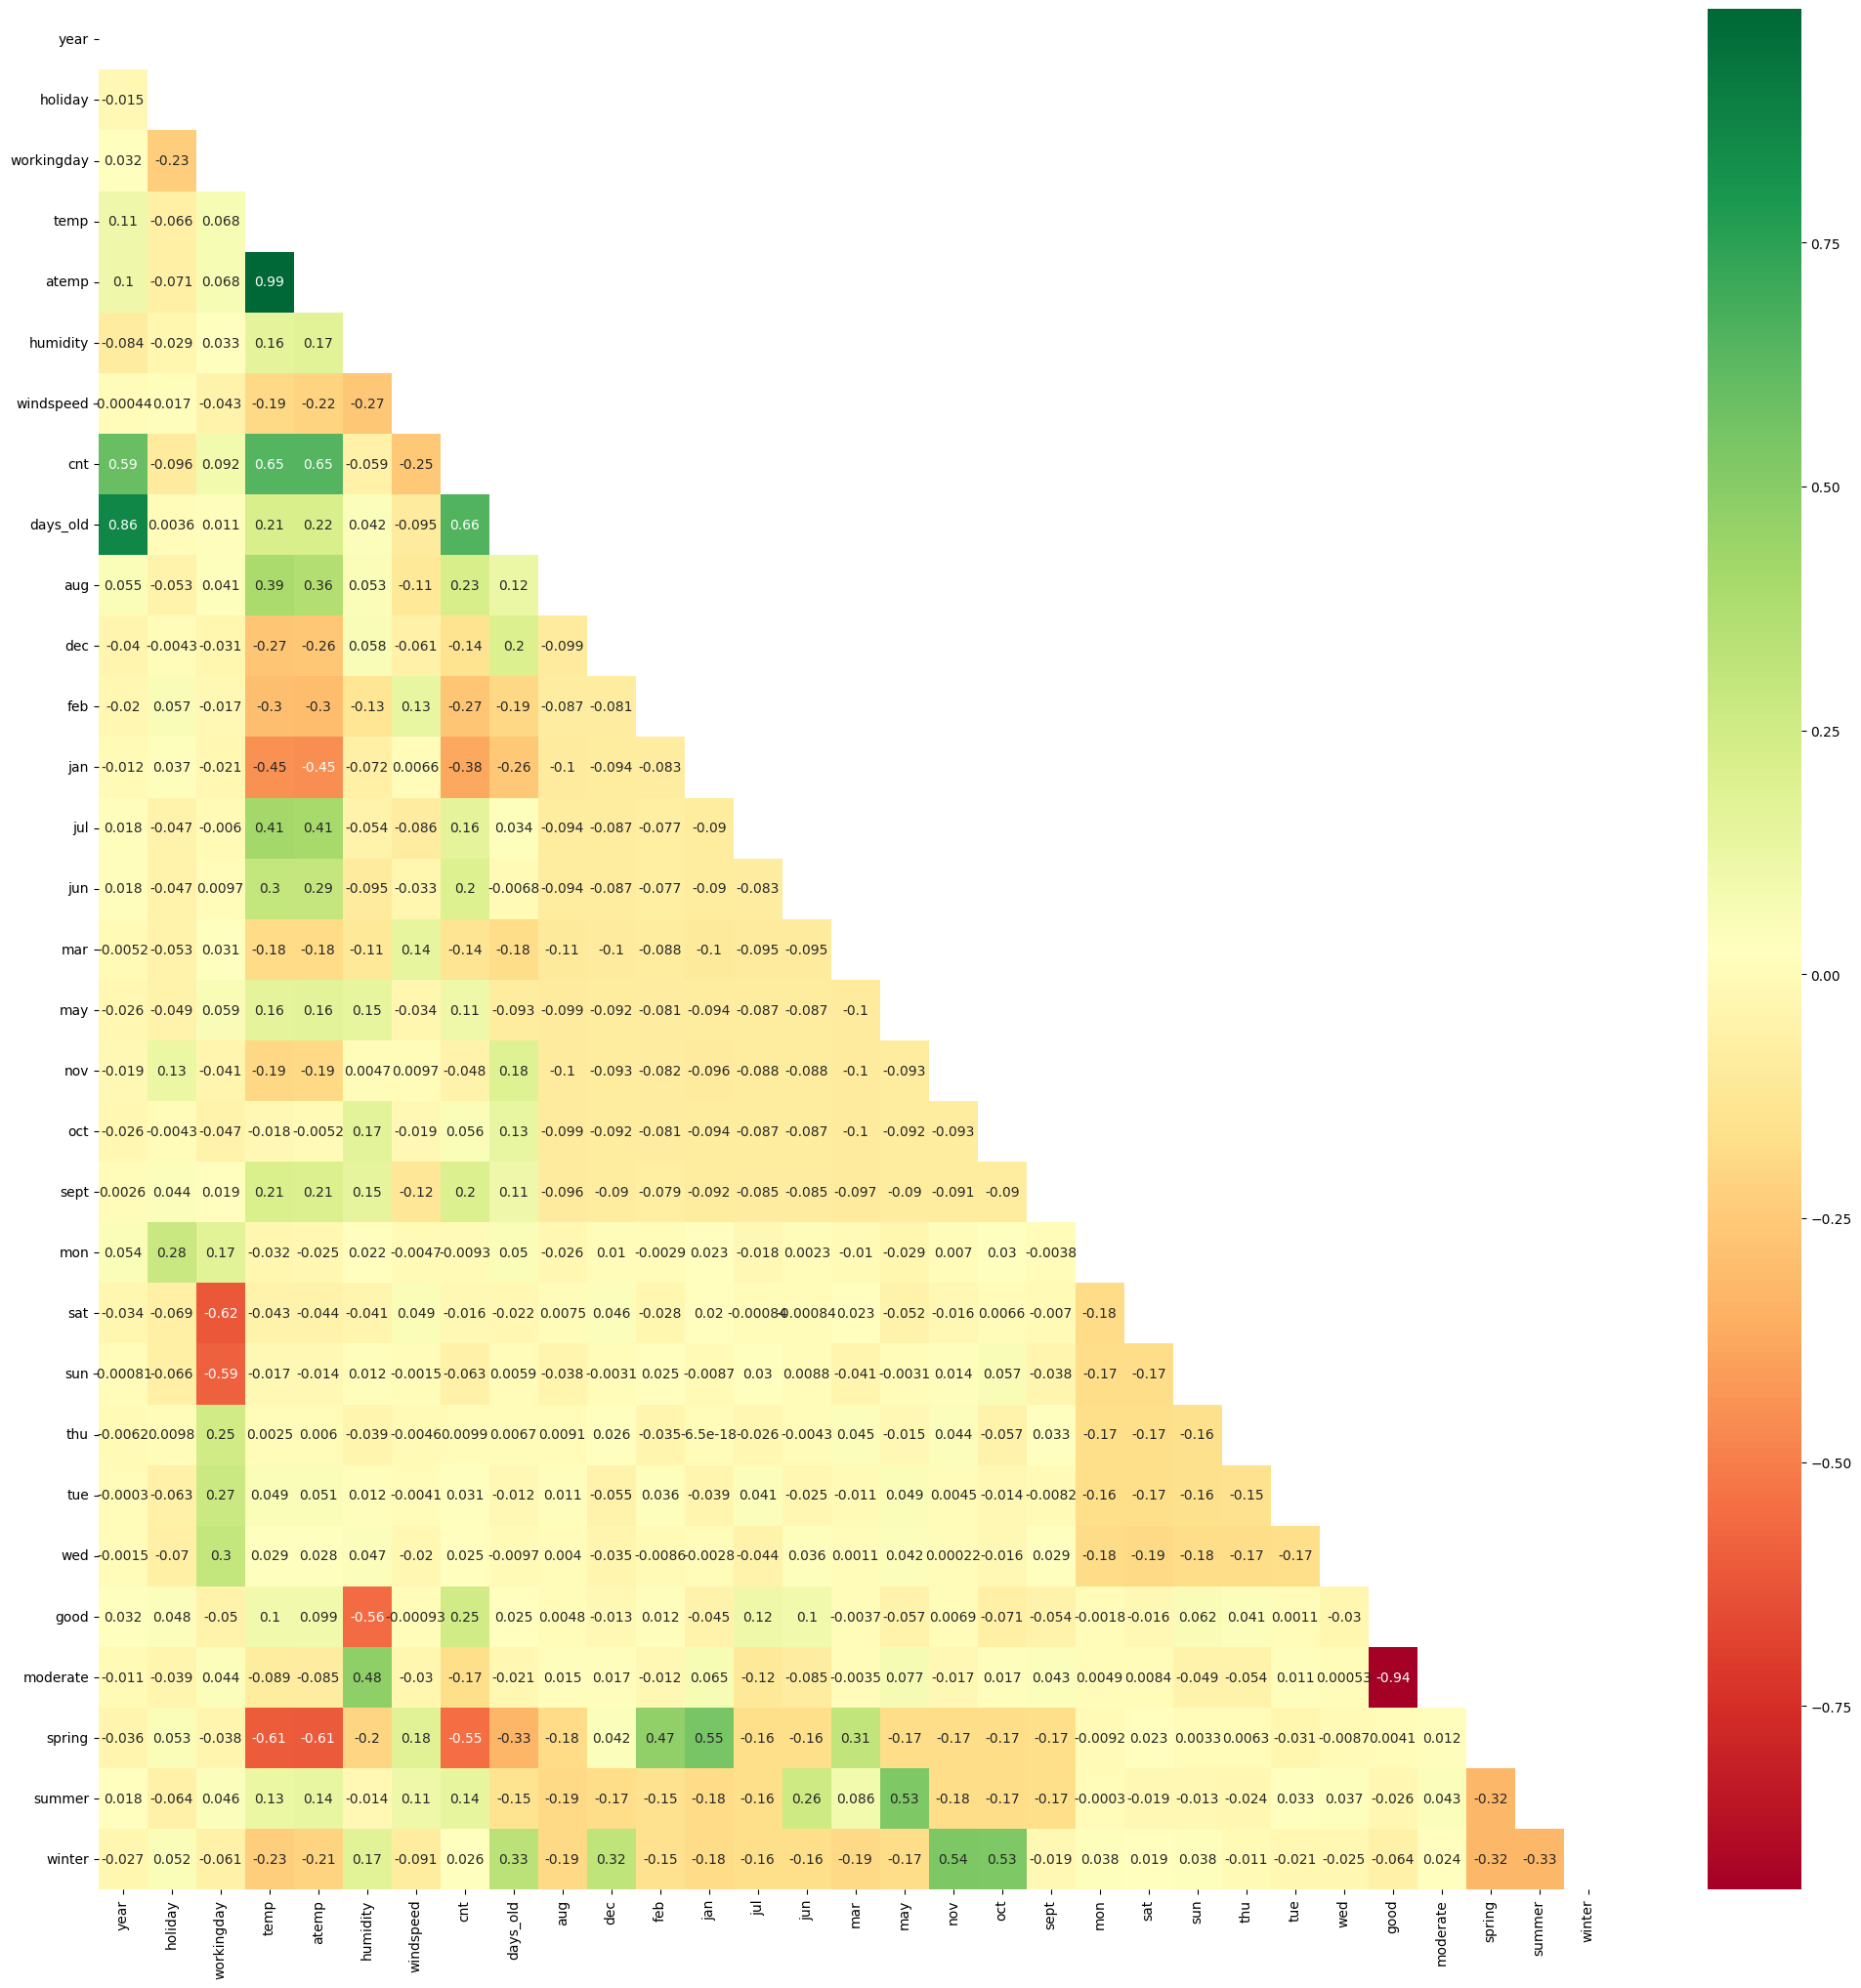

In [584]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

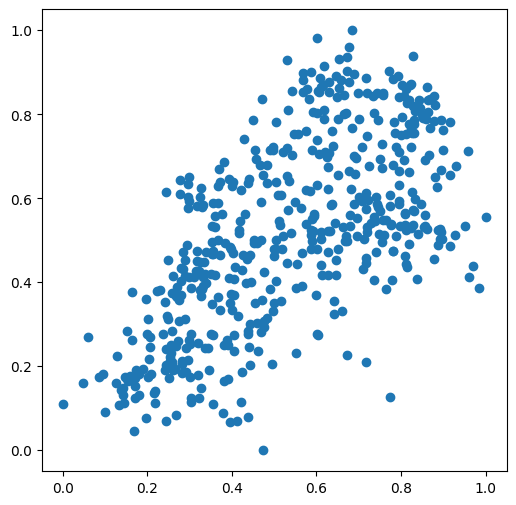

In [585]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [586]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

## 4.4 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [587]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [588]:
#Cut down number of features to 15 using automated approach

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [589]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 16),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [590]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'jul', 'sept', 'sat', 'good', 'moderate', 'spring', 'summer', 'winter'],
      dtype='object')


In [591]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'days_old', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov',
       'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [592]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [593]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [594]:
# calculate VIF

calculateVIF(X_train_rfe)

Features    VIF
4     humidity  25.63
3         temp  22.84
10        good  14.80
11    moderate   9.07
12      spring   5.69
2   workingday   5.42
5    windspeed   4.69
14      winter   4.12
13      summer   3.21
0         year   2.10
9          sat   2.00
6          jan   1.70
7          jul   1.59
8         sept   1.40
1      holiday   1.19

## Step 5: Building a linear model

In [595]:
# Building 1st linear regression model

#Selected columns for Model 1 - all columns selected by RFE

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        17:51:00   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.048      0.092      0.9

Features    VIF
4     humidity  25.63
3         temp  22.84
10        good  14.80
11    moderate   9.07
12      spring   5.69
2   workingday   5.42
5    windspeed   4.69
14      winter   4.12
13      summer   3.21
0         year   2.10
9          sat   2.00
6          jan   1.70
7          jul   1.59
8         sept   1.40
1      holiday   1.19

VIF values seems to be good now. But we will see if we can reduce further ?

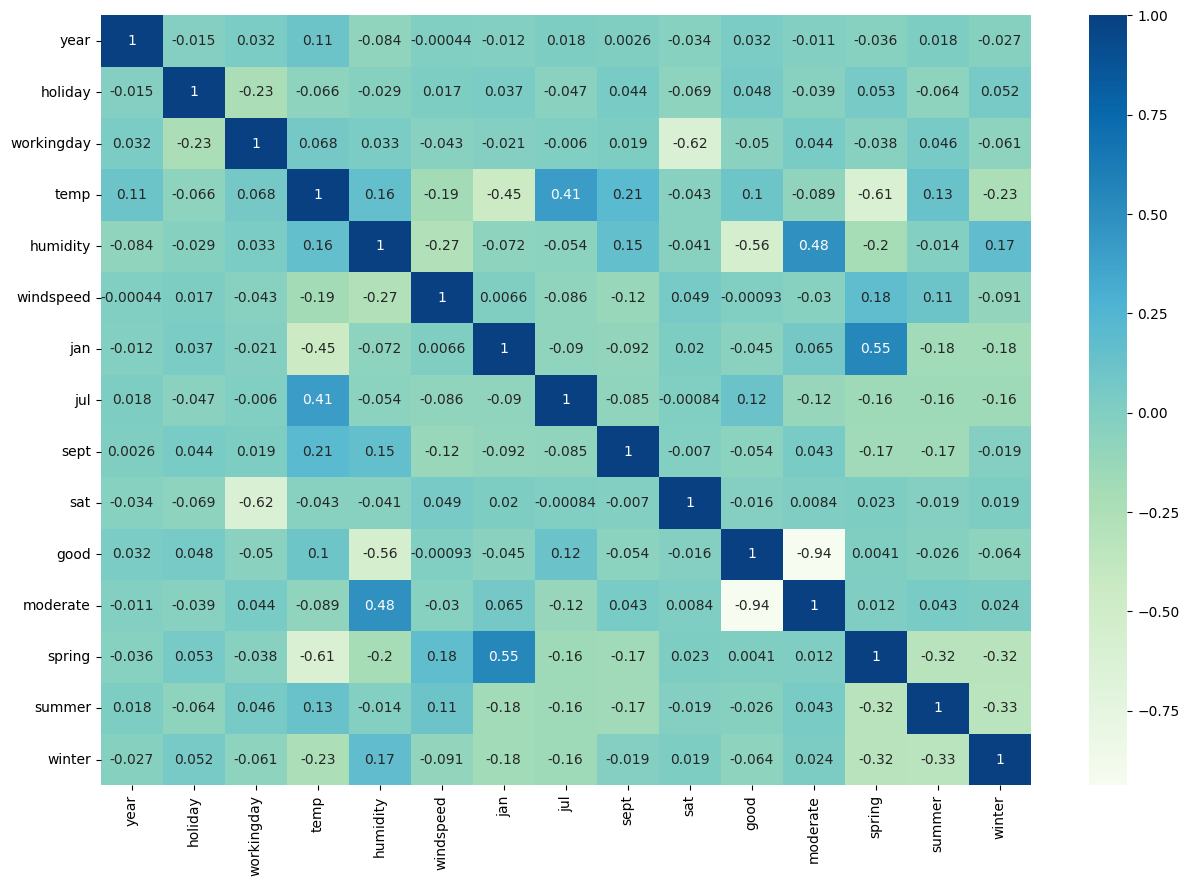

In [596]:
# Checking correlation of features selected by RFE with target column.
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(X_train_rfe[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'jul', 'sept', 'sat', 'good', 'moderate', 'spring', 'summer', 'winter']].corr(), cmap='GnBu', annot=True)
plt.show()

In [597]:
# Building 2nd linear regression model

# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          1.60e-188
Time:                        17:51:01   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1171      0.039     -2.980      0.0

Features    VIF
9         good  14.79
3         temp  13.96
10    moderate   8.48
2   workingday   5.34
4    windspeed   4.67
11      spring   4.48
12      summer   2.79
13      winter   2.74
0         year   2.08
8          sat   1.99
5          jan   1.66
6          jul   1.59
7         sept   1.35
1      holiday   1.18

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [598]:
# Building 3rd linear regression model

# As good shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['good'], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.07e-162
Time:                        17:51:01   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.036      4.630      0.0

Features   VIF
3         temp  7.06
2   workingday  5.22
4    windspeed  4.62
10      spring  3.07
11      summer  2.34
0         year  2.07
8          sat  1.96
12      winter  1.96
5          jan  1.62
6          jul  1.59
9     moderate  1.55
7         sept  1.34
1      holiday  1.17

In [599]:
# Building 4th linear regression model

# Dropping the variable jan as it has negative coefficient and is insignificant as it has high p-value
# As Jan shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          6.82e-163
Time:                        17:51:01   Log-Likelihood:                 444.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     497   BIC:                            -807.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1512      0.035      4.345      0.0

Features   VIF
3         temp  6.96
2   workingday  5.19
4    windspeed  4.60
9       spring  2.49
10      summer  2.34
0         year  2.06
11      winter  1.96
7          sat  1.95
5          jul  1.58
8     moderate  1.54
6         sept  1.34
1      holiday  1.17

In [600]:

# Building 5th linear regression model

# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          1.73e-163
Time:                        17:51:01   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.035      4.169      0.0

Features   VIF
2         temp  6.72
1   workingday  4.63
3    windspeed  4.59
8       spring  2.38
9       summer  2.32
0         year  2.06
10      winter  1.90
6          sat  1.82
4          jul  1.58
7     moderate  1.54
5         sept  1.33

In [601]:
# Building 6th linear regression model

# As temp shows high VIF values hence we can drop it
X_train_new_6 = X_train_new.drop(['temp'], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new_6)
lr_6 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


# Run the function to calculate VIF for the new model
calculateVIF(X_train_new_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          1.73e-163
Time:                        17:51:01   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.035      4.169      0.0

Features   VIF
2   windspeed  4.12
1  workingday  3.53
8      summer  2.26
7      spring  2.25
0        year  1.90
9      winter  1.90
5         sat  1.61
6    moderate  1.53
3         jul  1.29
4        sept  1.22

VIF value now seems to be good as it came below 5.

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### `_Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821
Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.



In [606]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [607]:
# Checking the parameters and their coefficient values
lr_6.params

const         0.538000
year          0.253518
workingday    0.047625
windspeed    -0.203458
jul          -0.011200
sept          0.060073
sat           0.054989
moderate     -0.076939
spring       -0.298755
summer       -0.043021
winter       -0.092488
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [608]:
X_train_new_6

year  workingday  windspeed  jul  sept  sat  moderate  spring  summer  \
576     1           1   0.264686    1     0    0         0       0       0   
426     1           0   0.255342    0     0    1         1       1       0   
728     1           0   0.663106    0     0    0         0       1       0   
482     1           0   0.188475    0     0    1         1       0       1   
111     0           1   0.380981    0     0    0         1       0       1   
..    ...         ...        ...  ...   ...  ...       ...     ...     ...   
578     1           1   0.187140    0     0    0         0       0       0   
53      0           1   0.111379    0     0    0         0       1       0   
350     0           0   0.431816    0     0    1         1       0       0   
79      0           1   0.529881    0     0    0         1       0       1   
520     1           1   0.359599    0     0    0         1       0       1   

     winter  
576       0  
426       0  
728       0  
482       0  
111       0  
..      ...  
578       0  
53        0  
350       1  
79        0  
520       0  

[510 rows x 10 columns]

In [609]:
#Build a model with above columns
lr = build_model_sk(X_train_new_6,y_train)
print(lr.intercept_,lr.coef_)

0.5379995326817497 [ 0.25351755  0.04762485 -0.20345754 -0.01119982  0.06007301  0.05498888
 -0.07693917 -0.29875524 -0.04302092 -0.09248799]


## Step 7. Model Evaluation
### 7.1 Residucal Analysis

In [610]:
y_train_pred = lr.predict(X_train_new_6)

#### Normality of error terms

In [613]:
# Plot the histogram of the error terms
def plot_res_dist(act, pred):
  fig = plt.figure()
  sns.distplot(act-pred, bins = 20)
  fig.suptitle('Error Terms', fontsize = 20)
  plt.xlabel('Errors', fontsize = 18)



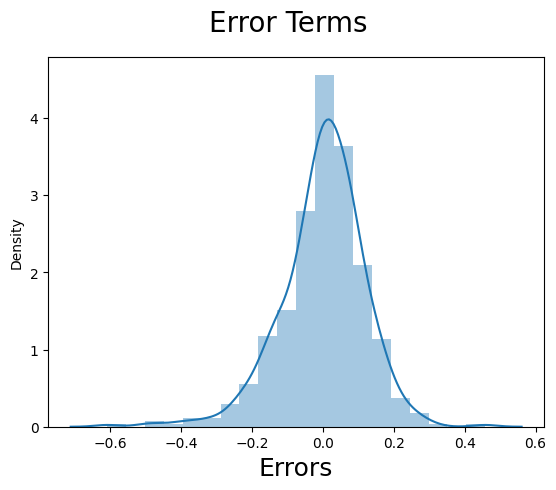

In [614]:
plot_res_dist(y_train, y_train_pred)


Errors are normally distribured here with mean 0. So everything seems to be fine

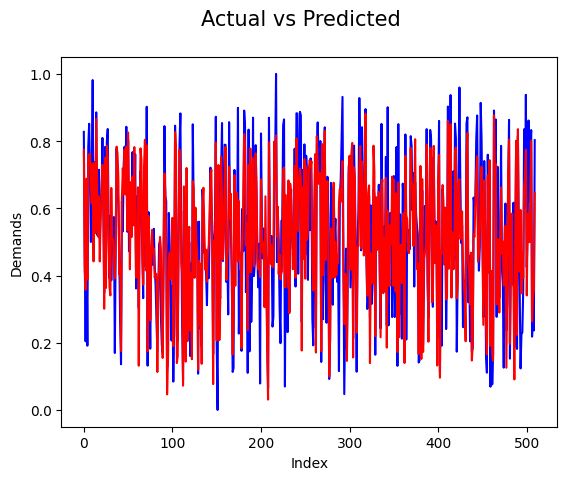

In [615]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

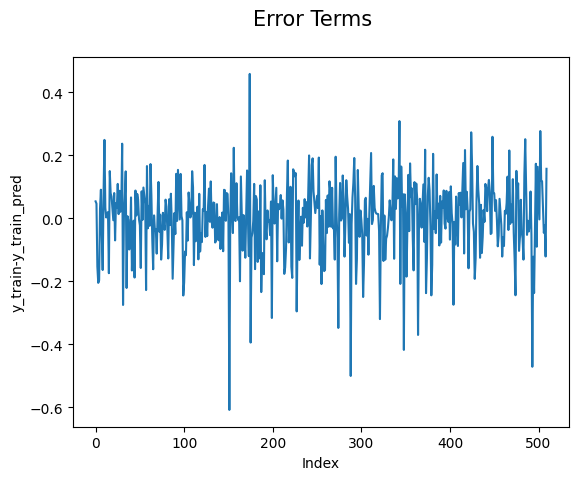

In [616]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here,If we see the error terms are independent of each other.

In [617]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7188925000872834

_`Inference`_
R2 Same as we obtained for our final model

### 7.2 Linearity Check

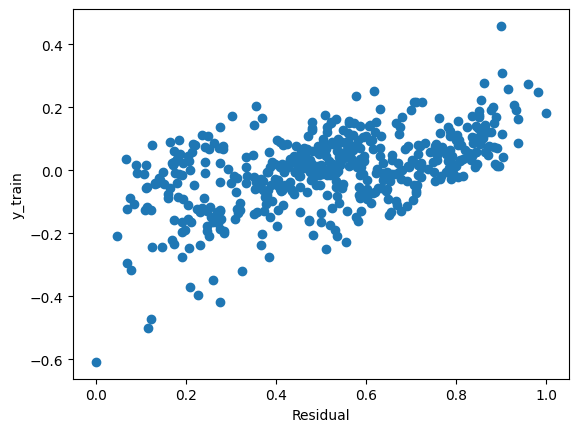

In [618]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [627]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           1  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  days_old  aug  ...  sat  sun  thu  tue  wed  good  moderate  \
184  0.692706       184    0  ...    0    0    0    0    0     0         1   
535  0.712034       535    0  ...    0    0    0    0    1     1         0   
299  0.303382       299    0  ...    0    0    1    0    0     0         1   
221  0.547400       221    1  ...    0    0    0    0    1     1         0   
152  0.569029       152    0  ...    0    0    1    0    0     1         0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 31 columns]

In [628]:
df_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    days_old         aug  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154  357.127273    0.059091  ...    0.118182   
std      0.159584    0.219163  214.116582    0.236333  ...    0.323559   
min     -0.042808    0.048205    3.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595  170.500000    0.000000  ...    0.000000   
50%      0.300126    0.524678  349.500000    0.000000  ...    0.000000   
75%      0.402718    0.677750  538.750000    0.000000  ...    0.000000   
max      0.807474    0.963300  729.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed        good    moderate  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.145455    0.163636    0.168182    0.100000    0.654545    0.318182   
std      0.353363    0.370789    0.374881    0.300684    0.476601    0.466833   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer      winter  
count  220.000000  220.000000  220.000000  
mean     0.254545    0.263636    0.236364  
std      0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 31 columns]

In [629]:
y_test = df_test.pop('cnt')
X_test = df_test

In [630]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [634]:
#Build a model with above columns
lr = build_model_sk(X_test_lm_6,y_test)
print(lr.intercept_,lr.coef_)

y_pred = lr.predict(X_test_lm_6)

0.1921861072061533 [ 0.          0.25060288  0.02900971  0.44889575 -0.08974168 -0.04712264
  0.03099637  0.04123994 -0.057435   -0.13557844  0.01101542  0.05704037]


In [635]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7917

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

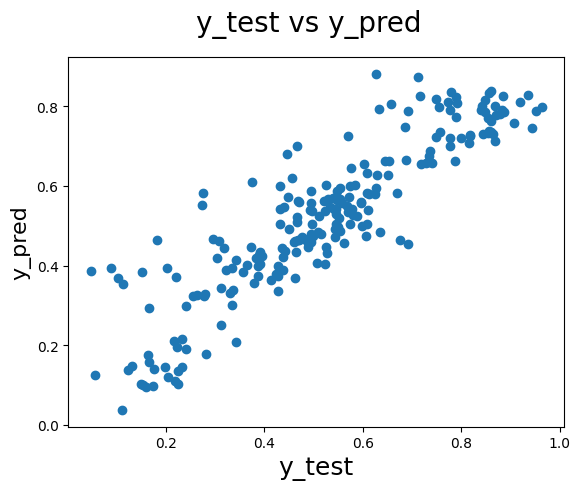

In [636]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [637]:
round(lr_6.params,4)

const         0.5380
year          0.2535
workingday    0.0476
windspeed    -0.2035
jul          -0.0112
sept          0.0601
sat           0.0550
moderate     -0.0769
spring       -0.2988
summer       -0.0430
winter       -0.0925
dtype: float64

In [638]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7807


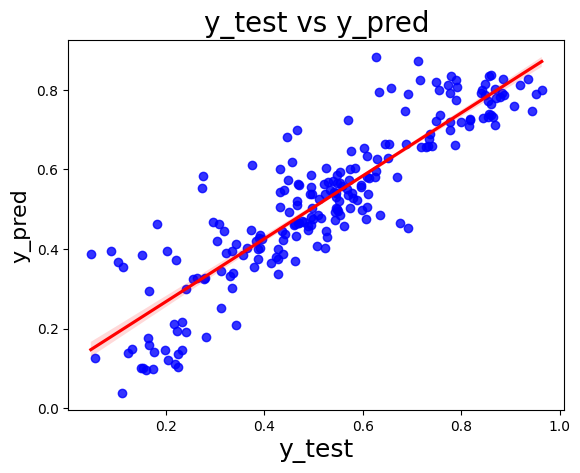

In [639]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()